In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, welch, filtfilt
import librosa
import librosa.display
from IPython.display import Audio
import scipy.io.wavfile as wav

In [2]:
# Lecture du fichier audio
data, fs = librosa.load('song.wav')
Audio(data, rate=fs)

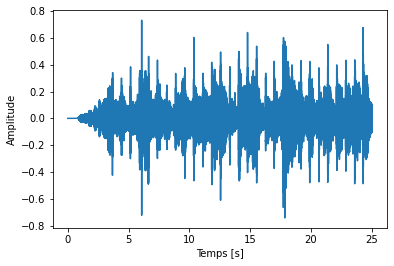

In [7]:
# Visualisation du signal
time = np.linspace(0,data.shape[0]/fs,data.shape[0])
plt.plot(time,data)
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.show()

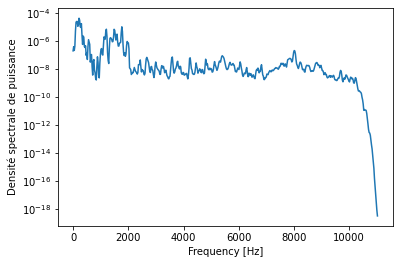

In [21]:
# Densité spectrale de puissance
freq, Pxx = welch(data, fs, nperseg=1024)
# Visualisation
plt.semilogy(freq, Pxx)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Densité spectrale de puissance')
plt.show()

In [10]:
# Définition des frequences de coupure pour la voix
f1 = 900
f2 = 2100

In [11]:
# Coef du filtre butterworth
b, a = butter(5, [f1*2/fs, f2*2/fs], btype='band')

In [12]:
# Application du filtre
whistle = filtfilt(b, a, data)
instruments = data - whistle

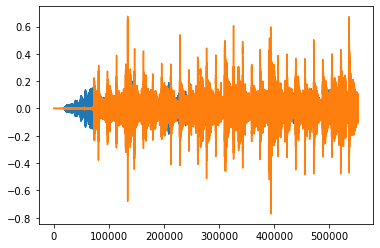

In [13]:
# Visualisation des données audio filtrées
plt.plot(whistle, label="Voix")
plt.plot(instruments, label="Instruments")
plt.show()

In [14]:
Audio(instruments, rate=fs)

In [15]:
Audio(whistle, rate=fs)

In [18]:
# Enregistrer les résultats
whistle = np.int16(whistle / np.max(np.abs(whistle)) * 32767)
instruments = np.int16(instruments / np.max(np.abs(instruments)) * 32767)
wav.write('whistle.wav', fs, whistle)
wav.write('instruments.wav', fs, instruments)